# QuatIca Core Functionality Demo

This notebook demonstrates all the core functionality examples from the README.
Run each cell to see the code in action!

## Setup and Imports

In [1]:
import sys
import os
import numpy as np
import quaternion
import matplotlib.pyplot as plt

In [2]:
# Add the core module to the path
sys.path.append('core')

In [3]:
print("✅ All imports successful!")

✅ All imports successful!


## 1. Basic Matrix Operations

In [4]:
from core.utils import quat_matmat, quat_frobenius_norm
from core.data_gen import create_test_matrix

In [5]:
# Create test matrices
A = create_test_matrix(3, 4)
B = create_test_matrix(4, 2)

In [6]:
print("Matrix A shape:", A.shape)
print("Matrix B shape:", B.shape)
print("Matrix A norm:", quat_frobenius_norm(A))
print("Matrix B norm:", quat_frobenius_norm(B))

Matrix A shape: (3, 4)
Matrix B shape: (4, 2)
Matrix A norm: 16.137622969456427
Matrix B norm: 18.95598038048724


In [7]:
# Matrix multiplication
C = quat_matmat(A, B)
print("Matrix C = A @ B shape:", C.shape)
print("Matrix C norm:", quat_frobenius_norm(C))

Matrix C = A @ B shape: (3, 2)
Matrix C norm: 116.41638771935487


In [8]:
print("✅ Basic matrix operations work!")

✅ Basic matrix operations work!


## 2. QR Decomposition

In [9]:
from core.decomp.qsvd import qr_qua

In [10]:
# Create a test matrix
X_quat = create_test_matrix(4, 3)
print("Input matrix X shape:", X_quat.shape)

Input matrix X shape: (4, 3)


In [11]:
# QR decomposition
Q, R = qr_qua(X_quat)
print("Q shape:", Q.shape)
print("R shape:", R.shape)

Q shape: (4, 3)
R shape: (3, 3)


In [12]:
# Verify reconstruction
X_recon = quat_matmat(Q, R)
reconstruction_error = quat_frobenius_norm(X_quat - X_recon)
print("Reconstruction error:", reconstruction_error)

Reconstruction error: 4.6674778155799156e-15


In [13]:
print("✅ QR decomposition works!")

✅ QR decomposition works!


## 3. Quaternion SVD (Q-SVD)

In [14]:
from core.decomp.qsvd import classical_qsvd, classical_qsvd_full

In [15]:
# Create a test matrix
X_quat = create_test_matrix(5, 4)
print("Input matrix X shape:", X_quat.shape)

Input matrix X shape: (5, 4)


In [16]:
# Truncated Q-SVD
R = 2  # Target rank
U, s, V = classical_qsvd(X_quat, R)
print("Truncated Q-SVD:")
print("  U shape:", U.shape)
print("  s length:", len(s))
print("  V shape:", V.shape)

Truncated Q-SVD:
  U shape: (5, 2)
  s length: 2
  V shape: (4, 2)


In [17]:
# Full Q-SVD
U_full, s_full, V_full = classical_qsvd_full(X_quat)
print("\nFull Q-SVD:")
print("  U_full shape:", U_full.shape)
print("  s_full length:", len(s_full))
print("  V_full shape:", V_full.shape)


Full Q-SVD:
  U_full shape: (5, 5)
  s_full length: 4
  V_full shape: (4, 4)


In [18]:
print("✅ Q-SVD works!")

✅ Q-SVD works!


## 4. Randomized Q-SVD

In [19]:
from core.decomp.qsvd import rand_qsvd
from core.utils import quat_hermitian

In [20]:
# Create a test matrix
X_quat = create_test_matrix(8, 6)
print("Input matrix X shape:", X_quat.shape)

Input matrix X shape: (8, 6)


In [21]:
# Randomized Q-SVD with different parameters
R = 3  # Target rank
print(f"Target rank R = {R}")

Target rank R = 3


In [22]:
# Test with different power iterations
for n_iter in [1, 2, 3]:
    print(f"\nTesting with {n_iter} power iteration(s):")
    
    U, s, V = rand_qsvd(X_quat, R, oversample=5, n_iter=n_iter)
    print(f"  U shape: {U.shape}")
    print(f"  V shape: {V.shape}")
    print(f"  s shape: {s.shape}")
    print(f"  Singular values: {s}")
    
    # Test reconstruction
    S_diag = np.diag(s)
    X_recon = quat_matmat(quat_matmat(U, S_diag), quat_hermitian(V))
    reconstruction_error = quat_frobenius_norm(X_quat - X_recon)
    relative_error = reconstruction_error / quat_frobenius_norm(X_quat)
    print(f"  Reconstruction error: {reconstruction_error:.6f}")
    print(f"  Relative error: {relative_error:.6f}")


Testing with 1 power iteration(s):
  U shape: (8, 3)
  V shape: (6, 3)
  s shape: (3,)
  Singular values: [51.81911428 33.36946572 23.54520617]
  Reconstruction error: 11.551165
  Relative error: 0.172453

Testing with 2 power iteration(s):
  U shape: (8, 3)
  V shape: (6, 3)
  s shape: (3,)
  Singular values: [51.81911428 33.36946572 23.54520617]
  Reconstruction error: 11.551165
  Relative error: 0.172453

Testing with 3 power iteration(s):
  U shape: (8, 3)
  V shape: (6, 3)
  s shape: (3,)
  Singular values: [51.81911428 33.36946572 23.54520617]
  Reconstruction error: 11.551165
  Relative error: 0.172453


In [23]:
# Test with full rank for perfect reconstruction
print(f"\nTesting with full rank (R = {min(X_quat.shape)}):")
U_full, s_full, V_full = rand_qsvd(X_quat, min(X_quat.shape), oversample=5, n_iter=2)
S_full_diag = np.diag(s_full)
X_recon_full = quat_matmat(quat_matmat(U_full, S_full_diag), quat_hermitian(V_full))
reconstruction_error_full = quat_frobenius_norm(X_quat - X_recon_full)
print(f"  Full rank reconstruction error: {reconstruction_error_full:.2e}")


Testing with full rank (R = 6):
  Full rank reconstruction error: 8.02e-14


In [24]:
print("✅ Randomized Q-SVD works!")

✅ Randomized Q-SVD works!


## 5. Eigenvalue Decomposition

In [25]:
from core.decomp import quaternion_eigendecomposition, quaternion_eigenvalues, quaternion_eigenvectors
from core.utils import quat_hermitian

In [26]:
# Create a Hermitian matrix A = B^H @ B
B = create_test_matrix(4, 3)
B_H = quat_hermitian(B)
A_quat = quat_matmat(B_H, B)
print("Hermitian matrix A shape:", A_quat.shape)

Hermitian matrix A shape: (3, 3)


In [27]:
# Full eigendecomposition
eigenvalues, eigenvectors = quaternion_eigendecomposition(A_quat)
print("Full eigendecomposition:")
print("  Number of eigenvalues:", len(eigenvalues))
print("  Eigenvectors shape:", eigenvectors.shape)

Full eigendecomposition:
  Number of eigenvalues: 3
  Eigenvectors shape: (3, 3)


In [28]:
# Extract only eigenvalues
eigenvals = quaternion_eigenvalues(A_quat)
print("\nEigenvalues only:", len(eigenvals))


Eigenvalues only: 3


In [29]:
# Extract only eigenvectors
eigenvecs = quaternion_eigenvectors(A_quat)
print("Eigenvectors only shape:", eigenvecs.shape)

Eigenvectors only shape: (3, 3)


In [30]:
# Verify eigenvalues are real
imaginary_parts = np.imag(eigenvalues)
max_imag = np.max(np.abs(imaginary_parts))
print("Maximum imaginary part:", max_imag)

Maximum imaginary part: 7.495713500337219e-37


In [31]:
print("✅ Eigenvalue decomposition works!")

✅ Eigenvalue decomposition works!


## 6. Tridiagonalization

In [32]:
from core.decomp import tridiagonalize

In [33]:
# Use the same Hermitian matrix from above
print("Hermitian matrix A shape:", A_quat.shape)

Hermitian matrix A shape: (3, 3)


In [34]:
# Tridiagonalize
P, B_tridiag = tridiagonalize(A_quat)
print("Tridiagonalization:")
print("  P shape:", P.shape)
print("  B shape:", B_tridiag.shape)

Tridiagonalization:
  P shape: (3, 3)
  B shape: (3, 3)


In [35]:
# Verify transformation
P_H = quat_hermitian(P)
PAP_H = quat_matmat(quat_matmat(P, A_quat), P_H)
transformation_error = quat_frobenius_norm(PAP_H - B_tridiag)
print("  Transformation error:", transformation_error)

  Transformation error: 7.610398653245878e-14


In [36]:
print("✅ Tridiagonalization works!")

✅ Tridiagonalization works!


## 7. Pseudoinverse Computation

In [37]:
from core.solver import NewtonSchulzPseudoinverse

In [38]:
# Create a test matrix
A = create_test_matrix(3, 4)
print("Matrix A shape:", A.shape)

Matrix A shape: (3, 4)


In [39]:
# Compute pseudoinverse
solver = NewtonSchulzPseudoinverse()
A_pinv, residuals, covariances = solver.compute(A)
print("Pseudoinverse A^† shape:", A_pinv.shape)

Pseudoinverse A^† shape: (4, 3)


In [40]:
# Verify pseudoinverse properties
A_pinv_H = quat_hermitian(A_pinv)
print("A^† shape:", A_pinv.shape)
print("A^†^† shape:", A_pinv_H.shape)

A^† shape: (4, 3)
A^†^† shape: (3, 4)


In [41]:
print("✅ Pseudoinverse computation works!")

✅ Pseudoinverse computation works!


## 8. Linear System Solving

In [42]:
from core.solver import QGMRESSolver

In [43]:
# Create a square system A * x = b
A = create_test_matrix(3, 3)
b = create_test_matrix(3, 1)
print("System A shape:", A.shape)
print("Right-hand side b shape:", b.shape)

System A shape: (3, 3)
Right-hand side b shape: (3, 1)


In [44]:
# Solve using Q-GMRES
solver = QGMRESSolver()
x, info = solver.solve(A, b)
print("Solution x shape:", x.shape)
print("Convergence info:", info)

Solution x shape: (3, 1)
Convergence info: {'iterations': 3, 'residual': np.float64(4.073144510065666e-16), 'residual_history': [[1, np.float64(0.8180831680177888), np.float64(0.8180831680177888)], [2, np.float64(0.6238197975271147), np.float64(0.5103364762331976)], [3, np.float64(6.178152935775884e-16), np.float64(4.073144510065666e-16)]], 'converged': np.True_, 'V0': array([[ 0.46522931,  0.12921957,  0.04855825],
       [ 0.00368814, -0.29767171,  0.23769528],
       [ 0.15480183, -0.22480936, -0.00892216]]), 'V1': array([[-0.27661535, -0.54108669, -0.21513944],
       [ 0.08311018, -0.36948167,  0.58532952],
       [-0.21345651,  0.17812458,  0.39376057]]), 'V2': array([[ 0.11408826, -0.12085569,  0.40912197],
       [ 0.19341816,  0.09343266, -0.19251439],
       [-0.33916021, -0.16398616, -0.03491743]]), 'V3': array([[ 0.09046808,  0.38090392, -0.02559214],
       [ 0.48248555,  0.01159317,  0.22959858],
       [-0.47345992,  0.43322662,  0.37160216]])}


In [45]:
# Verify solution
Ax = quat_matmat(A, x)
residual = quat_frobenius_norm(Ax - b)
print("Residual ||A*x - b||:", residual)

Residual ||A*x - b||: 3.953878923864522e-15


In [46]:
print("✅ Linear system solving works!")

✅ Linear system solving works!


## 9. Visualization

In [47]:
from core.visualization import Visualizer

In [48]:
# Create a test matrix
A = create_test_matrix(4, 4)
print("Matrix A shape:", A.shape)

Matrix A shape: (4, 4)


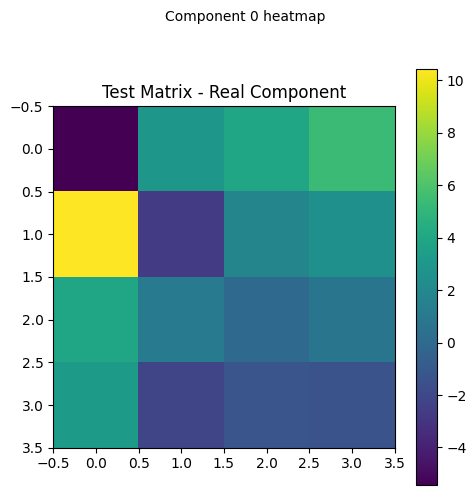

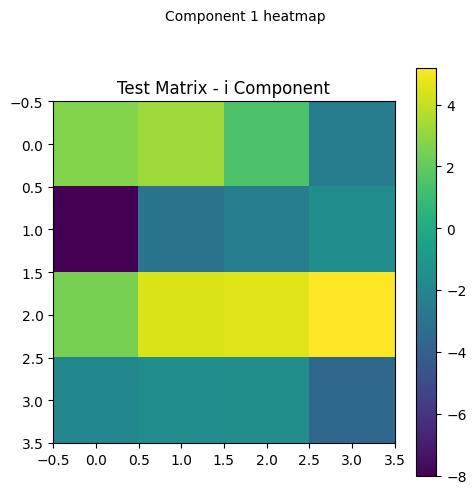

In [49]:
# Plot matrix components
Visualizer.visualize_matrix(A, component=0, title="Test Matrix - Real Component")
Visualizer.visualize_matrix(A, component=1, title="Test Matrix - i Component")

In [50]:
print("✅ Visualization works!")

✅ Visualization works!


## Summary

In [51]:
print("🎉 ALL CORE FUNCTIONALITY TESTS COMPLETED SUCCESSFULLY!")
print("\n✅ Basic matrix operations")
print("✅ QR decomposition")
print("✅ Quaternion SVD (Q-SVD)")
print("✅ Randomized Q-SVD")
print("✅ Eigenvalue decomposition")
print("✅ Tridiagonalization")
print("✅ Pseudoinverse computation")
print("✅ Linear system solving")
print("✅ Visualization")
print("\nThe code examples in the README are working correctly! 🚀") 

🎉 ALL CORE FUNCTIONALITY TESTS COMPLETED SUCCESSFULLY!

✅ Basic matrix operations
✅ QR decomposition
✅ Quaternion SVD (Q-SVD)
✅ Randomized Q-SVD
✅ Eigenvalue decomposition
✅ Tridiagonalization
✅ Pseudoinverse computation
✅ Linear system solving
✅ Visualization

The code examples in the README are working correctly! 🚀
